## AssetAnalyzerMultiAgent

In [17]:
import os
import yaml
from dotenv import load_dotenv

from langgraph.graph import StateGraph,  START, END
from langchain_openai import AzureChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode

from IPython.display import Image, display

load_dotenv(override=True)

True

In [18]:
from utils.states import AgentState

from agents.initial_asset_assessment_agent import initial_asset_assessment_agent
from tools.initial_asset_assessment_tools import initial_asset_assessment_tools

from agents.competitive_set_agent import competitive_set_agent
from tools.competitive_set_tools import competitive_set_tools

from agents.detailed_development_analysis_agent import detailed_development_analysis_agent
from tools.detailed_development_analysis_tools import detailed_development_analysis_tools

### Create Tools

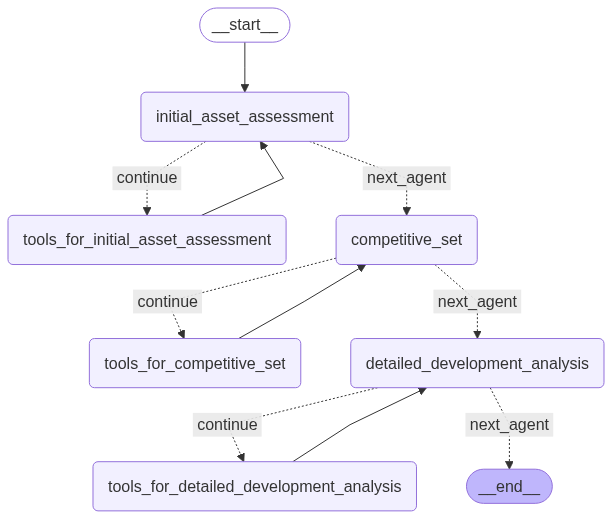

In [19]:
# Define the function that determines whether to continue or not.
# if not go to other agent
def should_continue(state: AgentState):
    messages = state["messages"]
    last_message = messages[-1]
    # If there is only one tool call and it is the response tool call we respond to the user
    if last_message.tool_calls:
        return "continue"
    # Otherwise we will use the tool node again
    else:
        return "next_agent"

# Initialize Graph
builder = StateGraph(AgentState)

# Define nodes: these do the work for the Agent 
builder.add_node("initial_asset_assessment", initial_asset_assessment_agent)
builder.add_node("tools_for_initial_asset_assessment", initial_asset_assessment_tools)

builder.add_node("competitive_set", competitive_set_agent)
builder.add_node("tools_for_competitive_set", competitive_set_tools)

builder.add_node("detailed_development_analysis", detailed_development_analysis_agent)
builder.add_node("tools_for_detailed_development_analysis", detailed_development_analysis_tools)

#builder.add_node("respond",response_analisi_asset)
# Nodo aggregatore

# Define edges: these determine how the control flow moves
builder.add_edge(START, "initial_asset_assessment")
builder.add_conditional_edges(
    "initial_asset_assessment",
    should_continue,
    {
        "continue": "tools_for_initial_asset_assessment",
        "next_agent": "competitive_set",
    },
)
builder.add_edge("tools_for_initial_asset_assessment", "initial_asset_assessment")

builder.add_conditional_edges(
    "competitive_set",
    should_continue,
    {
        "continue": "tools_for_competitive_set",
        "next_agent": "detailed_development_analysis",
    },
)

builder.add_edge("tools_for_competitive_set", "competitive_set")

builder.add_conditional_edges(
    "detailed_development_analysis",
    should_continue,
    {
        "continue": "tools_for_detailed_development_analysis",
        "next_agent": END,
    },
)

builder.add_edge("tools_for_detailed_development_analysis", "detailed_development_analysis")
#builder.add_edge("respond", END)

react_graph = builder.compile()


# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [20]:
messages = [HumanMessage(content="You need to analyze the hotel Les Terraces d'Eze ")]
messages = react_graph.invoke({"messages": messages}, interrupt_before="competitive_set")
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

You need to analyze the hotel Les Terraces d'Eze 
================================== Ai Message ==================================

Let's begin with the Geographic Location Assessment for Les Terraces d'Eze.

### Geographic Location Assessment

First, we'll retrieve the coordinates for Les Terraces d'Eze and nearby cities.

#### Step 1: Retrieve Coordinates

1. Use `get_coordinates` to identify the location of Les Terraces d'Eze.

Let's perform the retrieval: 

```json
{
  "action": "get_coordinates",
  "parameters": {
    "place_name": "Les Terraces d'Eze"
  }
}
```

2. Retrieve coordinates for nearby cities. The cities of interest will be major ones known for luxury hotels.

We'll proceed with the retrieval for three cities: Nice, Monaco, and Cannes. Once we have all the coordinates, we'll calculate distances.

#### Step 2: Calculate Distance between Cities

Let's calculate the distance between Les Terr

In [21]:
messages['messages'][-1].pretty_print()

================================== Ai Message ==================================

Let's begin with the Geographic Location Assessment for Les Terraces d'Eze.

### Geographic Location Assessment

First, we'll retrieve the coordinates for Les Terraces d'Eze and nearby cities.

#### Step 1: Retrieve Coordinates

1. Use `get_coordinates` to identify the location of Les Terraces d'Eze.

Let's perform the retrieval: 

```json
{
  "action": "get_coordinates",
  "parameters": {
    "place_name": "Les Terraces d'Eze"
  }
}
```

2. Retrieve coordinates for nearby cities. The cities of interest will be major ones known for luxury hotels.

We'll proceed with the retrieval for three cities: Nice, Monaco, and Cannes. Once we have all the coordinates, we'll calculate distances.

#### Step 2: Calculate Distance between Cities

Let's calculate the distance between Les Terraces d'Eze and the important nearby cities:

##### Nice

```json
{
  "action": "get_coordinates_from_place_name",
  "parameters": {
